(ref:lec2:ex2)=
# Exercise 2.2


We want to control the angular position of a DC motor. The transfer function between the applied voltage and the position is

$$
G(s) = \frac{10}{s(s+10)}
$$

We adopt a proportional controller:

$$
F(s) = K
$$


1. For which values of $K$ is the closed-loop stable?
2. If the reference signal is $\theta_{ref}(t) = R \cdot \textrm{step}(t)$, for what values of $K$ the steady-state output error is less than $1\%$?

---

## Solution

### Question 1

We start by computing the closed-loop transfer function:

$$
G_c(s) = \frac{K \cdot G(s)}{1 + K \cdot G(s)} = \frac{10 K}{s^2 + 10 s + 10 K}
$$

Then, similar to {ref}`ref:lec1:ex3`, we analyze how the poles of $G_c(s)$ change as a function of $K$. 

$$
s^2 + 10s +10K = 0
$$

The discriminant is $\Delta = 100 - 40 K$.


#### Case $\Delta > 0$
If $K \leq 2.5$, the discriminant is positive ($\Delta > 0$), which means we have two real solutions

$$
s = \frac{-10 \pm \sqrt{100 - 40K}}{2} = -5 \pm \sqrt{25 - 10K}
$$

The real part of the poles is strictly negative as long as $\sqrt{25 - 10K} \leq 5$, that is, $0 < K \leq 2.5$.

#### Case $\Delta < 0$

If $K > 2.5$ the discriminant is negative, hence we have two complex-conjugate solutions

$$
s = \frac{-10 \pm i \sqrt{\lvert \Delta \lvert}}{2} = -5 \pm i \sqrt{\frac{\lvert \Delta \lvert}{4}}
$$

The real part is negative and independent of $K$. Therefore, for any $K > 2.5$ the closed-loop is stable.

#### Solution to question 1

Any $K > 0$ makes the closed-loop stable.

We can double-check this result looking at the root locus of the system. 

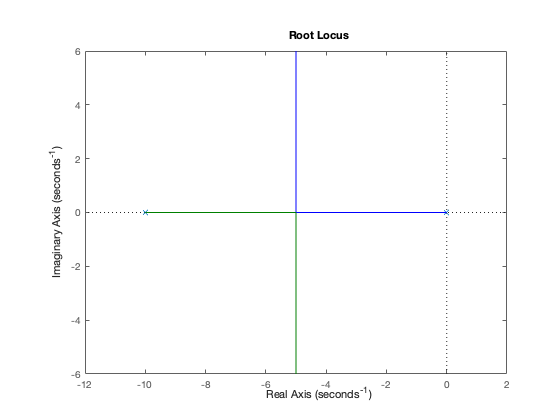

In [1]:
% Check if we are running in Octave or MATLAB
if exist('OCTAVE_VERSION', 'builtin')
    pkg load control; warning('off', 'all');
    if isempty(getenv('BINDER_SERVICE_HOST')); t = 'notebook'; else; t = 'plotly'; end
    graphics_toolkit(t);
end

s = tf('s');
G = 10/(s*(s+10));
rlocus(G); hold on; 

As can be seen, the closed-loop poles are always located in the left-hand half-plane.

### Question 2

We now restrict ourselves to the case $K > 0$, where the closed-loop is stable. Thanks to the stability of the closed-loop, we can apply the Final Value Theore (where $\Theta_{ref}(s) = \frac{R}{s}$)

$$
\lim_{t \to \infty} \theta(t) = \lim_{s \to 0} s \left( G_c(s) \Theta_{ref}(s) \right) = \lim_{s \to 0} s \left( \frac{10 K}{s^2 + 10 s + 10 K} \frac{R}{s} \right) = \frac{10K}{10 K} = R
$$

The steady-state error is $e(\infty) = \theta_{ref}(\infty) - \theta(\infty)  = R - R = 0$ for every value of $K > 0$.